# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

from glob import glob
import sys
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import cv2

# Getting the Data (Train+Test)

In [2]:
train_path = "../input/paddy-disease-classification/train_images"
test_path = "../input/paddy-disease-classification/test_images"

# Labels

In [3]:
print(sorted(os.listdir(train_path)))

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


# Displaying Images of each category

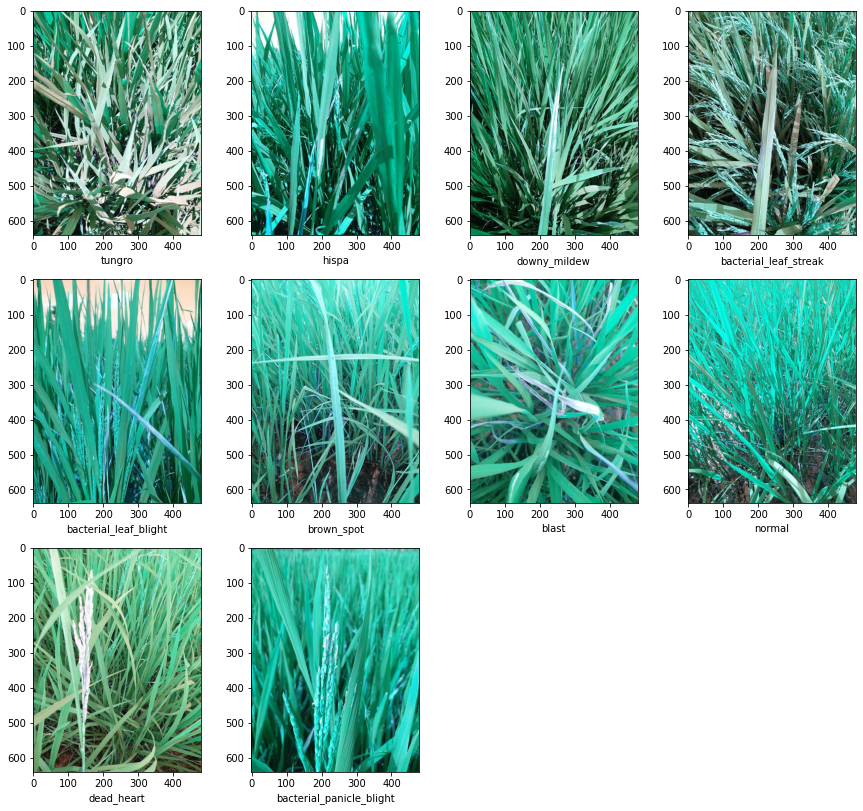

In [4]:
i=1
plt.figure(figsize=(15,14)) #
for category in os.listdir(train_path):  
        path = os.path.join(train_path,category)  # create path to class
        for img in os.listdir(path):  # iterate over each image
            path1 = os.path.join(path,img)  # create path to class
            image = cv2.imread(path1)
            plt.subplot(3,4,i)
            plt.grid(False)
            plt.xlabel(category)
            plt.imshow(image)
            i=i+1
            break

# Image Dimension

In [5]:
image = cv2.imread(path1)
print('Dimensions : ',image.shape)

Dimensions :  (640, 480, 3)


In [6]:
print(len(os.listdir(test_path)))


3469


# Category Count

In [7]:
x=0
for category in os.listdir(train_path):  
        path = os.path.join(train_path,category)  # create path to class
        print(category," count=> ",len(os.listdir(path)))
        x=x+len(os.listdir(path))

print("\ntotal no of training image: ",x)

tungro  count=>  1088
hispa  count=>  1594
downy_mildew  count=>  620
bacterial_leaf_streak  count=>  380
bacterial_leaf_blight  count=>  479
brown_spot  count=>  965
blast  count=>  1738
normal  count=>  1764
dead_heart  count=>  1442
bacterial_panicle_blight  count=>  337

total no of training image:  10407


# Augmentation of Dataset and setting Batch size and target size

In [8]:
batch_size = 64
target_size = (320,240)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
    )
# val_datagen   = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
#     )

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
#         color_mode="grayscale",
        class_mode='categorical',
        subset='training',
        shuffle=True)

val_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
#         color_mode="grayscale",
        class_mode='categorical',
        subset='validation',
        shuffle=True
)

Found 7808 images belonging to 10 classes.
Found 2599 images belonging to 10 classes.


In [9]:

input_shape = (256,256,1) # img_rows, img_colums, color_channels
num_classes = 10
print(num_classes)
labels = sorted(os.listdir(train_path))
print(labels)

10
['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


# Our CNN Model

In [14]:
from tensorflow.keras.optimizers import RMSprop,Adam

model = models.Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding= 'same', activation= 'relu', input_shape = (320,240,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides= 2))
#

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides= 2))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides= 2))
#
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2),strides= 2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides= 2))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides= 2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides= 2))

# model.add(Dropout(0.2))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))
optimizer = Adam()
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 320, 240, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 320, 240, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 159, 119, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 159, 119, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 79, 59, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 79, 59, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 39, 29, 128)      

# Setting Epoch and step size

In [11]:
num_epochs = 30
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_val   = val_generator.n//val_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_val)

122
40


# Early stopping

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

# Model Training

In [15]:
model_train = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=STEP_SIZE_TRAIN,  verbose=1, 
                        validation_data=val_generator,
                        validation_steps = STEP_SIZE_val,
                        callbacks=[early_stop]
                        )

Epoch 1/30
122/122 [==============================] - 263s 2s/step - loss: 2.1741 - accuracy: 0.1653 - val_loss: 2.1614 - val_accuracy: 0.1703
Epoch 2/30
122/122 [==============================] - 260s 2s/step - loss: 2.1377 - accuracy: 0.1966 - val_loss: 2.0286 - val_accuracy: 0.3187
Epoch 3/30
122/122 [==============================] - 260s 2s/step - loss: 1.8132 - accuracy: 0.3633 - val_loss: 1.8033 - val_accuracy: 0.3625
Epoch 4/30
122/122 [==============================] - 259s 2s/step - loss: 1.6024 - accuracy: 0.4451 - val_loss: 1.5327 - val_accuracy: 0.4695
Epoch 5/30
122/122 [==============================] - 262s 2s/step - loss: 1.4137 - accuracy: 0.5156 - val_loss: 1.3740 - val_accuracy: 0.5250
Epoch 6/30
122/122 [==============================] - 258s 2s/step - loss: 1.2801 - accuracy: 0.5643 - val_loss: 1.2091 - val_accuracy: 0.5996
Epoch 7/30
122/122 [==============================] - 270s 2s/step - loss: 1.1280 - accuracy: 0.6226 - val_loss: 1.0952 - val_accuracy: 0.6305

# Graph of loss and accuracy

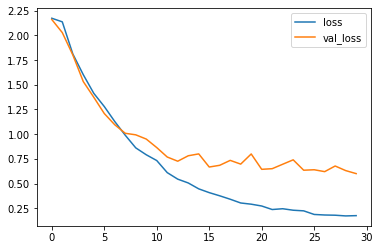

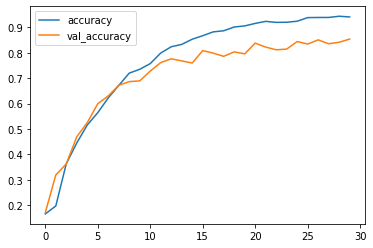

In [18]:
history_df = pd.DataFrame(model_train.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [27]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [35]:
test_dataset = image_dataset_from_directory(    
    '../input/paddy-disease-classification/test_images',
    image_size = (320,240),
    batch_size = 64,
    shuffle=False,
    labels=None,
    class_names = None,
    label_mode = None,
    color_mode='rgb',
)

Found 3469 files belonging to 1 classes.


# predictions

In [36]:
predictions = model.predict(test_dataset)
predictions.shape

(3469, 10)

In [37]:
predictions[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
ss = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
ss['label'] = np.argmax(predictions, axis=-1)
ss['label'] = ss['label'].replace([0,1,2,3,4,5,6,7,8,9], labels)
ss.to_csv("Submission.csv",index=False)
ss.head()

,image_id,label
0,200001.jpg,bacterial_panicle_blight
1,200002.jpg,normal
2,200003.jpg,hispa
3,200004.jpg,blast
4,200005.jpg,blast
